# Pymaceuticals Inc.
---

### Analysis

Observations from data
- Capomulin and Ramicane are the drug regimens tested on the most mice 
- The drugs were tested on a very close number of male and female mice 
- Propriva was tested on the least number of mice
- Ketapril has the highest mean of tumor volume compared to other drug treatments 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
Mouse_metadata = pd.read_csv(mouse_metadata_path)
Study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(Mouse_metadata,Study_results)
# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice. 249
mouse_count = len(combined_df["Mouse ID"].unique())
mouse_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
counted_values = combined_df['Mouse ID'].value_counts()
counted_values.head()

g989    13
k403    10
j365    10
j984    10
k210    10
Name: Mouse ID, dtype: int64

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
#Getting the duplicate mice by ID that shows up for Timepoint
counted_values = combined_df['Timepoint'].value_counts()
counted_values.head()

0     250
5     238
10    223
15    207
20    195
Name: Timepoint, dtype: int64

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_mice = combined_df[combined_df.duplicated(['Mouse ID',])]
all_duplicate_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop_duplicates("Mouse ID")
clean_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [8]:
# Checking the number of mice in the clean DataFrame. 248
mouse_count = clean_df["Mouse ID"].count()
mouse_count

249

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_tumor = combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor = combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance_tumor = combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_tumor = combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_tumor = combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_data= pd.DataFrame({"Mean of Tumor":mean_tumor,
                        "Median of Tumor":median_tumor,
                        "Var of Tumor":variance_tumor,
                         "STD of Tumor":std_tumor,
                          "SEM of Tumor":sem_tumor})
summary_data

,Mean of Tumor,Median of Tumor,Var of Tumor,STD of Tumor,SEM of Tumor
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
mean_tumor = combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor = combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance_tumor = combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_tumor = combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_tumor = combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
# Use groupby and summary statistical methods to calculate the following pro
# Using the aggregation method, produce the same summary statistics in a single line.
summary_data= pd.DataFrame({"Mean of Tumor":mean_tumor,
                        "Median of Tumor":median_tumor,
                        "Var of Tumor":variance_tumor,
                         "STD of Tumor":std_tumor,
                          "SEM of Tumor":sem_tumor})
summary_data

,Mean of Tumor,Median of Tumor,Var of Tumor,STD of Tumor,SEM of Tumor
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

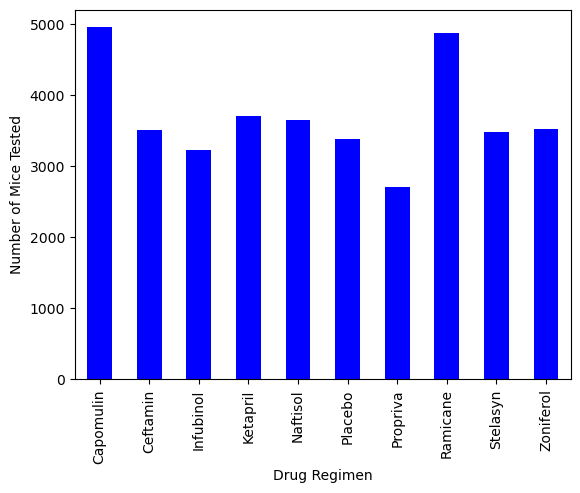

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
grouped_df = combined_df.groupby('Drug Regimen')['Timepoint'].sum()
grouped_df.plot(kind='bar', color='blue')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.show()

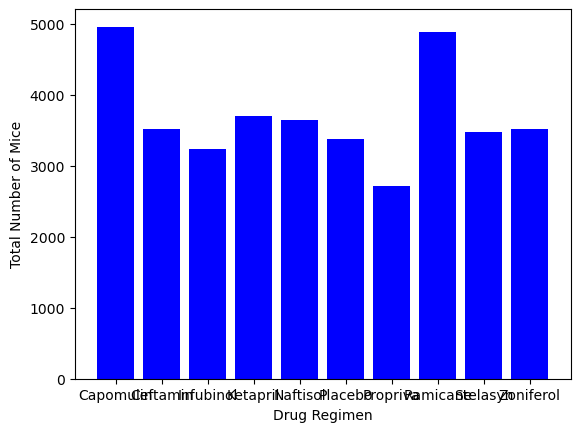

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(grouped_df.index, grouped_df.values, color='blue')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Mice')
plt.show()

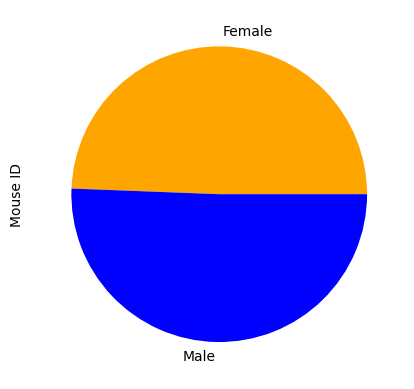

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
grouped_df = combined_df.groupby('Sex')['Mouse ID'].count()
grouped_df.plot(kind='pie', colors=['orange', 'blue'])
plt.show()

([<matplotlib.patches.Wedge at 0x1e4efa0bee0>,
 [Text(0.02099250347258556, 1.0997996703027118, 'Female'),
  Text(-0.020992503472586185, -1.0997996703027118, 'Male')])

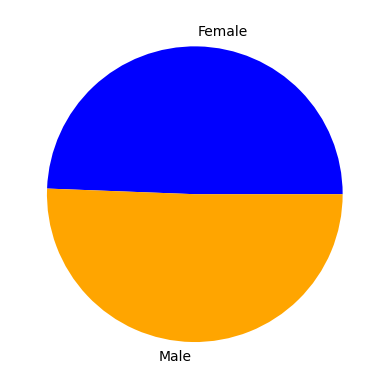

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(grouped_df.values, labels=grouped_df.index, colors=['blue', 'orange'])


## Quartiles, Outliers and Boxplots

In [28]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
grouped_df = df_selected.groupby('Drug Regimen').last()
final_volumes = pd.DataFrame({'Final Tumor Volume (mm3)': grouped_df['Tumor Volume (mm3)']})
final_volumes
# Start by getting the last (greatest) timepoint for each mouse
grouped_df = combined_df.groupby('Tumor Volume (mm3)')['Timepoint'].max()
greatest_timepoints = grouped_df.to_frame().reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(combined_df, greatest_timepoints, on=['Tumor Volume (mm3)', 'Timepoint'])
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,s185,Capomulin,Female,3,17,0,45.000000,0
2,x401,Capomulin,Female,16,15,0,45.000000,0
3,m601,Capomulin,Male,22,17,0,45.000000,0
4,g791,Ramicane,Male,11,16,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [31]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
def calculate_iqr(tumor_vol_data):
    quartiles = tumor_vol_data.quantile([0.25, 0.5, 0.75])
    lower = quartiles[0.25]
    upper = quartiles[0.75]
    iqr = upper - lower
    lower_fence = lower - (1.5 * iqr)
    upper_fence = upper + (1.5 * iqr)
    outliers =vol==_data[(tumor_vol_data < lower_femce) | (tumor_vol_data > upper_fence)]


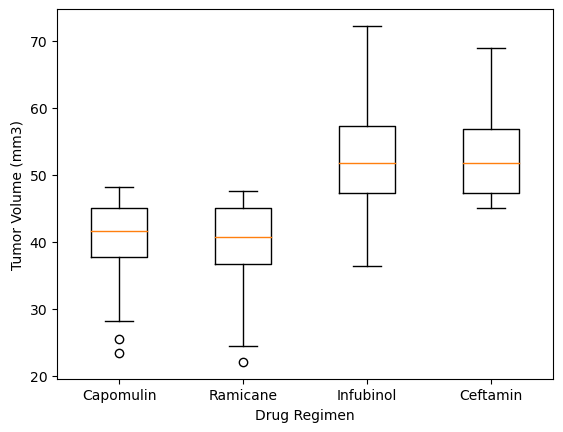

In [20]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
grouped_df = combined_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
mean_volumes = [grouped_df.loc['Capomulin'], grouped_df.loc['Ramicane'], grouped_df.loc['Infubinol'], grouped_df.loc['Ceftamin']]

plt.boxplot([combined_df[combined_df['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)'],
             combined_df[combined_df['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)'],
             combined_df[combined_df['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)'],
             combined_df[combined_df['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']])
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

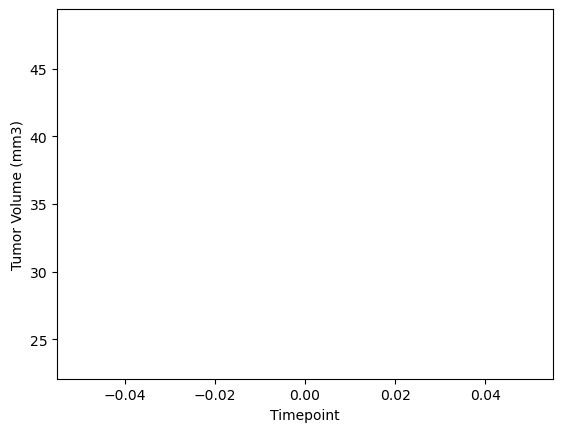

In [21]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = combined_df[combined_df['Drug Regimen'] == 'Capomulin']
grouped_df = combined_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
plt.plot([combined_df[combined_df['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)'],])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


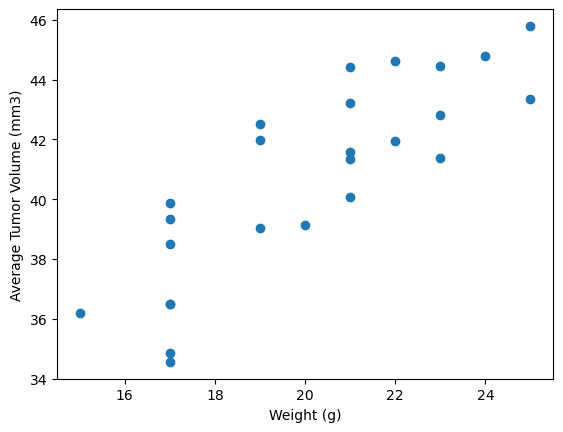

In [22]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = combined_df[combined_df['Drug Regimen'] == 'Capomulin']
grouped_df = capomulin_df.groupby(['Mouse ID']).agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'})

plt.scatter(grouped_df['Weight (g)'], grouped_df['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()



## Correlation and Regression

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr_coeff = combined_df['Weight(g)'].corr(combined_df['Average Tumor Volume (mm3)'])



KeyError: 'Weight(g)'